In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Essential Libraries

import pandas as pd
import numpy as np
from nltk.tokenize import WordPunctTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer,PorterStemmer,WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,SpatialDropout1D,LSTM,GRU,Activation
from sklearn.preprocessing import label_binarize,LabelBinarizer,LabelEncoder
from sklearn.utils import class_weight
from textblob import TextBlob
import tensorflow as tf
import keras
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from gensim.models import LdaModel
from bs4 import BeautifulSoup
import re
from gensim import corpora
import pyLDAvis.gensim_models
from wordcloud import WordCloud,STOPWORDS
import string
from sklearn.feature_extraction import text
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
pd.set_option('display.max_colwidth',100)

# Project Task: Week 1

# Class Imbalance Problem:

1. Perform an EDA on the dataset.

- See what a positive, negative, and neutral review looks like

- Check the class count for each class. It’s a class imbalance problem.

2. Convert the reviews in Tf-Idf score.

3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

In [4]:
# Import the train dataset

train = pd.read_csv('train_data.csv')
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assi...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue f...,Amazon Echo Plus AWESOME,Positive
2,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",Amazon,"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,T...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few things on screen but still limited.,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",Amazon,"eBook Readers,Fire Tablets,Electronics Features,Tablets,Amazon Tablets,College Ipads & Tablets,E...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and a very good price",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",Amazon,"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bought one for all of my nieces. No other case compares...,Very durable!,Positive


In [5]:
# Import the test dataset

test = pd.read_csv('test_data.csv')
test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",Amazon,"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & ...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and can be used by any one that wants to get online any...,very handy device
1,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",Amazon,"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,C...","Electronics,Hardware",2018-01-02T00:00:00.000Z,"The Echo Show is a great addition to the Amazon family. Works just like the Echo, but with a 7"" ...",Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas sale.,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",Amazon,"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to go on line. I also have down loaded books. I use it...",Love it!!!
4,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",Amazon,"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,C...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought it for loves it.,Fantastic!


In [6]:
# Import the test hidden dataset

test_hidden = pd.read_csv('test_data_hidden.csv')
test_hidden.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",Amazon,"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & ...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and can be used by any one that wants to get online any...,very handy device,Positive
1,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",Amazon,"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,C...","Electronics,Hardware",2018-01-02T00:00:00.000Z,"The Echo Show is a great addition to the Amazon family. Works just like the Echo, but with a 7"" ...",Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas sale.,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",Amazon,"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to go on line. I also have down loaded books. I use it...",Love it!!!,Positive
4,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",Amazon,"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,C...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought it for loves it.,Fantastic!,Positive


In [7]:
print('Train Dataset Size :',train.shape)
print('Test Dataset Size :',test.shape)
print('Tests Hidden Dataset Size :',test_hidden.shape)

Train Dataset Size : (4000, 8)
Test Dataset Size : (1000, 7)
Tests Hidden Dataset Size : (1000, 8)


In [8]:
train.dtypes

name                 object
brand                object
categories           object
primaryCategories    object
reviews.date         object
reviews.text         object
reviews.title        object
sentiment            object
dtype: object

# 1. Perform an EDA on the dataset.

In [9]:
train.duplicated().sum(),test.duplicated().sum(),test_hidden.duplicated().sum()

(58, 3, 3)

- Train dataset contains 58 duplicates records and test dataset contains 3 duplicate records

In [10]:
train = train[train.duplicated() == False]
print('Train Dataset Size :',train.shape)

Train Dataset Size : (3942, 8)


In [11]:
# Find out the information of train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               3942 non-null   object
 1   brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews.date       3942 non-null   object
 5   reviews.text       3942 non-null   object
 6   reviews.title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 277.2+ KB


In [12]:
# Find out the information of test dataset

test_hidden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


- Train dataset has 10 (0.25%) missing values in reviews.title and test dataset has 3 (0.03%) missing values in reviews.title

In [13]:
# Find out is there is any missing value present or not

print(train.isna().any())
print('\n',train.isna().sum())

name                 False
brand                False
categories           False
primaryCategories    False
reviews.date         False
reviews.text         False
reviews.title         True
sentiment            False
dtype: bool

 name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64


## See what a positive, negative, and neutral review looks like

In [14]:
pd.set_option('display.max_colwidth',200)

In [15]:
# Reviews containing Positive statement
train[train['sentiment'] == 'Positive'][['reviews.text']].head(10)

,reviews.text
0,"Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and wi..."
1,I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so happy with these purchases and learning so much w...
3,"very good product. Exactly what I wanted, and a very good price"
4,This is the 3rd one I've purchased. I've bought one for all of my nieces. No other case compares to this one. It has held protected the tablet so many times from them dropping it.
5,This is a great product. Light weight. I wish it has wifi to download from online.
7,Purchased this for my son. Has room to upgrade memory to allow more books & games. But the speakers could be better or located in a better position.
8,"Bought this for my mom and it was just what she needed and at a great price. Been wanting to get an Ipad for myself, but think this might be a great less expensive option for me as well."
10,"I got this tablet to replace my sons old one, I love the adult/child profile and the ability to have the 2 year replacement warranty. The case has also came in handy many times."
11,Great product for the kids gaming apps parental controls to make sure you can monitor kids and prevent unwanted app purchases
12,Love the choice of colors. Have two kindles of my own and purchased this for a gift.


In [16]:
# Reviews containing Negative statement
train[train['sentiment'] == 'Negative'][['reviews.text']].head(10)

,reviews.text
9,"was cheap, can not run chrome stuff, returned to store."
97,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, bathroom, pool, kitchen, other places where I may need hands free, voice activated music and info. My ..."
104,Too bad Amazon turned this tablet into a big advertising tool. Many apps dont work and the camera is not good.
121,"I bought this Kindle for my 7 year old grand-daughter. I bought a warranty for it. I bought it in August, I have already had to replace it. The charger connection got loose and was not charging. W..."
150,"I am reading positive reviews and wish I could say the same. Best Buy is great, so this is not a reflection on them, just our experience with the product. We have had this product for just over on..."
151,"I have to say it was a little confusing and frustrating when i was not getting the verification code from amazon , i waited for 20 minutes then i requested another code, nothing... then a nother o..."
249,It's a good device for children because they don't know any better
267,"the speaker voice quality is terrible compare the similar size my logitech UE BOOM.the price is too high, even I got on promotion with $79"
368,Needs to be a stand alone device. I should have not required to use a tablet of Cell phone to make it work. Amazon needs to work on the technology on device.
530,Has a very good Bluetooth speakers sound quality is good but otherwise she's pretty useless when it comes to get answering questions


In [17]:
# Reviews containing Neutral statement
train[train['sentiment'] == 'Neutral'][['reviews.text']].head(10)

,reviews.text
2,Just an average Alexa option. Does show a few things on screen but still limited.
6,"My 7-year old daughter saved up to by this. Her brother bought the 8GB about a year earlier, so new she needed more space. The OS is a bit clunky, and less intuitive then on higher priced tablets,..."
17,"Not as good as before the old kindle, just seams to work better"
59,There is nothing spectacular about this item but also nothing majorly wrong with it. The biggest flaw is that this is geared to kids and there is no way that I have found searching settings or onl...
95,It's unfair for me to rate this product cause I have not even taken it out of the box to set it up.
114,I bought this as s present for my 65 year old grandma. She loves it. Very easy to operate. No issues
146,Bought this tablet for 8 year old. It holding up good & she loves it. She enjoys playimg her games & being able to get on the internet.
147,"bought a few kindles in the past but this time one of it came defective. the port was bent and it was hard to charge but still possible. comes in 4 different color. was 16gb enough space for kids,..."
148,"Not a substitute for an iPad, but a really good tablet for reading and minimal internet usage."
187,This device is a good if you are looking for a starter tablet for a young individual.


## Check the class count for each class. It’s a class imbalance problem.

In [18]:
train['brand'].value_counts()

Amazon    3942
Name: brand, dtype: int64

In [19]:
train['primaryCategories'].value_counts()

Electronics                    2562
Electronics,Hardware           1159
Office Supplies,Electronics     204
Electronics,Media                17
Name: primaryCategories, dtype: int64

In [20]:
train['sentiment'].value_counts()

Positive    3694
Neutral      158
Negative      90
Name: sentiment, dtype: int64

In [21]:
pd.DataFrame(train.name.value_counts())

,name
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122
"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",82


In [22]:
pd.DataFrame(train.categories.value_counts())

,categories
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162
"Office,eBook Readers,Electronics Features,Walmart for Business,Tablets,Electronics,Amazon Ereaders,Office Electronics,iPad & Tablets,Kindle E-readers,All Tablets,Amazon Book Reader,Computers & Tablets",122


## Data cleaning

In [23]:
train['reviews.day'] = pd.to_datetime(train['reviews.date'],format='%Y-%m-%d').dt.day
train['reviews.month'] = pd.to_datetime(train['reviews.date'],format='%Y-%m-%d').dt.month
train['reviews.year'] = pd.to_datetime(train['reviews.date'],format='%Y-%m-%d').dt.year

test['reviews.day'] = pd.to_datetime(test['reviews.date'],format='%Y-%m-%d').dt.day
test['reviews.month'] = pd.to_datetime(test['reviews.date'],format='%Y-%m-%d').dt.month
test['reviews.year'] = pd.to_datetime(test['reviews.date'],format='%Y-%m-%d').dt.year

test_hidden['reviews.day'] = pd.to_datetime(test_hidden['reviews.date'],format='%Y-%m-%d').dt.day
test_hidden['reviews.month'] = pd.to_datetime(test_hidden['reviews.date'],format='%Y-%m-%d').dt.month
test_hidden['reviews.year'] = pd.to_datetime(test_hidden['reviews.date'],format='%Y-%m-%d').dt.year

train = train.drop(['brand','reviews.date'],axis=1)
test = test.drop(['brand','reviews.date'],axis=1)
test_hidden = test_hidden.drop(['brand','reviews.date'],axis=1)

In [24]:
encode = LabelEncoder()

train['name'] = encode.fit_transform(train['name'])
train['categories'] = encode.fit_transform(train['categories'])
train['primaryCategories'] = encode.fit_transform(train['primaryCategories'])
train['sentiment'] = encode.fit_transform(train['sentiment'])

test['name'] = encode.fit_transform(test['name'])
test['categories'] = encode.fit_transform(test['categories'])
test['primaryCategories'] = encode.fit_transform(test['primaryCategories'])

test_hidden['name'] = encode.fit_transform(test_hidden['name'])
test_hidden['categories'] = encode.fit_transform(test_hidden['categories'])
test_hidden['primaryCategories'] = encode.fit_transform(test_hidden['primaryCategories'])
test_hidden['sentiment'] = encode.fit_transform(test_hidden['sentiment'])

In [25]:
train['reviews.title'].fillna(value=' ',inplace=True)
test['reviews.title'].fillna(value=' ',inplace=True)
test_hidden['reviews.title'].fillna(value=' ',inplace=True)

In [26]:
tok = WordPunctTokenizer()
ps = PorterStemmer()
wnl = WordNetLemmatizer()
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
def data_cleaner(text):
    text = text.replace(r"Äú",'')
    text = text.replace(r'Äù','')
    text = text.replace(r'‚Äô','\'')
    text = text.lower()
    text = text.replace(r'‚Äô','\'')
    text = neg_pattern.sub(lambda x: negations_dic[x.group()], text)
    text = re.sub("[^a-zA-Z0-9\"]", " ", text)
    word_tok=[x for x in tok.tokenize(text) if len(x) > 3]
#     word_stem = [ps.stem(i) for i in word_tok]
#     return (" ".join(word_stem).strip())  
    word_lem = [wnl.lemmatize(i) for i in word_tok]
    return (" ".join(word_lem).strip()) 
for i in (train,test_hidden,test):
    i['reviews.text']=i['reviews.text'].apply(data_cleaner)
    i['reviews.title']=i['reviews.title'].apply(data_cleaner)    

# 2. Convert the reviews in Tf-Idf score.

In [27]:
tvec1 = TfidfVectorizer()
tvec2 = TfidfVectorizer()
tvec3 = TfidfVectorizer()

train1 = train.reset_index()
combine = train1.append(test_hidden,ignore_index=True,sort=False)
tvec1.fit(combine['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train1['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_hidden['reviews.text']).toarray())
tvec2.fit(combine['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train1['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_hidden['reviews.title']).toarray())
Train1 = pd.concat([train1.drop(['reviews.text','reviews.title','sentiment','index'],axis=1),
                    tvec_text1, tvec_title1],axis=1)
Test_Val1 = pd.concat([test_hidden.drop(['reviews.text','reviews.title','sentiment'],axis=1),
                       tvec_text2, tvec_title2],axis=1)
x_train1=Train1.values
y_train1=train['sentiment'].values
x_val1=Test_Val1.values
y_val1 = test_hidden['sentiment'].values

In [28]:
print(x_train1.shape)
print(x_val1.shape)
print(y_train1.shape)
print(y_val1.shape)

(3942, 5538)
(1000, 5538)
(3942,)
(1000,)


In [29]:
stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')
stemmer = SnowballStemmer('english')

In [30]:
def tokenize(text):
    return [stemmer.stem(term) for term in tokenizer.tokenize(text.lower())]
tfidf_token = TfidfVectorizer(stop_words=stop_words,tokenizer=tokenize,max_features=1000)
reviews = tfidf_token.fit_transform(train['reviews.text'])
words = tfidf_token.get_feature_names()

# 3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

In [31]:
mnb_model = MultinomialNB()
mnb_model.fit(Train1.values,train1['sentiment'])
ypred = mnb_model.predict(Test_Val1.values)
y_test = test_hidden['sentiment']
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, ypred)))
print("\nClassification report : \n", classification_report(y_test, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test, ypred))


Accuracy on validation set: 0.9370

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000


Confusion Matrix : 
 [[  0   0  24]
 [  0   0  39]
 [  0   0 937]]


- Everything is classified Positive label because of imbalance class.

# Tackling Class Imbalance Problem:

4. Oversampling or undersampling can be used to tackle the class imbalance problem. 

5. In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

6. Use Tree-based classifiers like Random Forest and XGBoost.

# 4. Oversampling or undersampling can be used to tackle the class imbalance problem.

## Oversampling

In [31]:
train['sentiment'].value_counts()

2    3694
1     158
0      90
Name: sentiment, dtype: int64

- In the train dataset has 3694(93.7%) Postive sentiment labeled, and 158(4%) has Neutral sentiment labeled, and 90(2.28%) has Negative label. So it is as imbalanced classification problem.

Text(0.5, 1.0, 'Imbalance Distribution review sentiment')

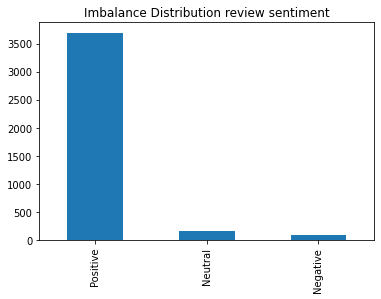

In [32]:
df = train.copy()
df.sentiment.replace((2,0,1),('Positive','Negative','Neutral'),inplace=True)
df.sentiment.value_counts().plot(kind='bar')
plt.title('Imbalance Distribution review sentiment')

In [33]:
count_2,count_1,count_0 = train.sentiment.value_counts()

class_2 = train[train['sentiment'] == 2]
class_1 = train[train['sentiment'] == 1]
class_0 = train[train['sentiment'] == 0]

class_0_over = class_0.sample(count_2,replace=True)
class_1_over = class_1.sample(count_2,replace=True)

train_over = pd.concat([class_2,class_0_over,class_1_over],axis=0)
print(train_over.shape)
print(train_over['sentiment'].value_counts())

(11082, 9)
2    3694
0    3694
1    3694
Name: sentiment, dtype: int64


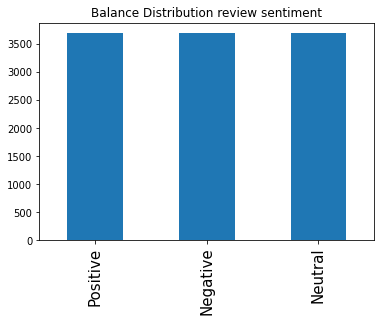

In [34]:
# Convert the sentiments

df = train_over.copy()
df.sentiment.replace((2,0,1),('Positive','Negative','Neutral'),inplace=True)
df.sentiment.value_counts().plot(kind='bar')
plt.title('Balance Distribution review sentiment')
plt.tick_params(axis='x', which='major', labelsize=15)

## Undersampling

In [35]:
train['sentiment'].value_counts()

2    3694
1     158
0      90
Name: sentiment, dtype: int64

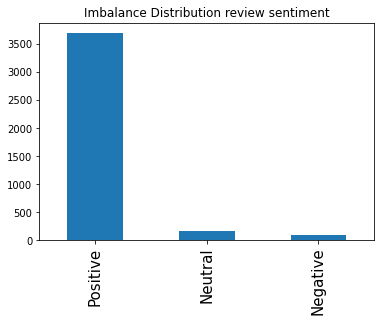

In [36]:
df = train.copy()
df.sentiment.replace((2,0,1),('Positive','Negative','Neutral'),inplace=True)
df.sentiment.value_counts().plot(kind='bar')
plt.title('Imbalance Distribution review sentiment')
plt.tick_params(axis='x', which='major', labelsize=15)

In [37]:
count_2,count_1,count_0 = train.sentiment.value_counts()

class_2 = train[train['sentiment'] == 2]
class_1 = train[train['sentiment'] == 1]
class_0 = train[train['sentiment'] == 0]

class_2_under = class_2.sample(count_1,replace=True)

train_under = pd.concat([class_2_under,class_0,class_1],axis=0)
print(train_under.shape)
print(train_under['sentiment'].value_counts())

(406, 9)
2    158
1    158
0     90
Name: sentiment, dtype: int64


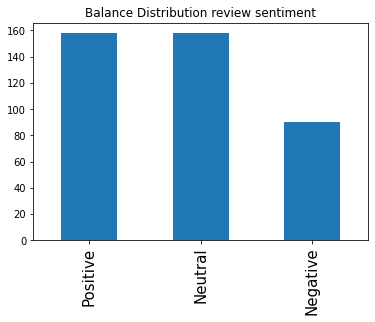

In [38]:
# Convert the sentiments
df = train_under.copy()
df.sentiment.replace((2,0,1),('Positive','Negative','Neutral'),inplace=True)
df.sentiment.value_counts().plot(kind='bar')
plt.title('Balance Distribution review sentiment')
plt.tick_params(axis='x', which='major', labelsize=15)

## TFIDF Vectorizer for under-sampled data

In [39]:
train = train_under.reset_index(drop=True) 
combine_under = train.append(test_hidden , ignore_index=True)
print(combine_under.shape)

tvec1.fit(combine_under['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_hidden['reviews.text']).toarray())

tvec2.fit(combine_under['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_hidden['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_hidden.drop(['reviews.text','reviews.title','sentiment'],axis=1),
                      tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_hidden['sentiment']

(1406, 9)


In [41]:
lr_model = LogisticRegression(class_weight='balanced', solver='sag', multi_class='multinomial', n_jobs=6, 
                              random_state=40, verbose=1, max_iter=1000)
lr_model.fit(x_train,y_train)
ypred = lr_model.predict(x_val)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_val, ypred)))
print("\nClassification report : \n", classification_report(y_val, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(y_val, ypred))

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 58 seconds

Accuracy on validation set: 0.3760

Classification report : 
               precision    recall  f1-score   support

           0       0.03      0.46      0.05        24
           1       0.05      0.28      0.08        39
           2       0.95      0.38      0.54       937

    accuracy                           0.38      1000
   macro avg       0.34      0.37      0.22      1000
weighted avg       0.89      0.38      0.51      1000


Confusion Matrix : 
 [[ 11   7   6]
 [ 16  11  12]
 [363 220 354]]


[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:   57.4s finished


0.5448768816391981


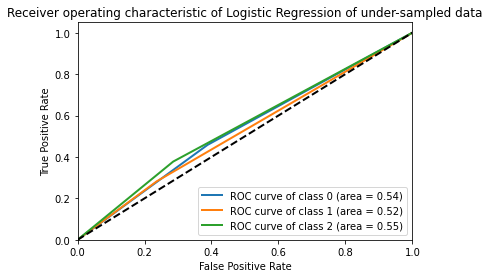

In [42]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(ypred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression of under-sampled data')
plt.legend(loc="lower right")
plt.show()

## TFIDF Vectorizer for over-sampled data

In [40]:
train = train_over.reset_index(drop=True) 

tvec1.fit(train['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_hidden['reviews.text']).toarray())

tvec2.fit(train['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_hidden['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_hidden.drop(['reviews.text','reviews.title','sentiment'],axis=1),
                      tvec_text2, tvec_title2],axis=1)

x_train=Train.values
y_train=train['sentiment'].values
x_val=Test_Val.values
y_val = test_hidden['sentiment'].values

In [44]:
lr_model.fit(x_train,y_train)
ypred = lr_model.predict(x_val)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_val, ypred)))
print("\nClassification report : \n", classification_report(y_val, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(y_val, ypred))

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 2204 seconds


[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed: 36.9min finished



Accuracy on validation set: 0.5960

Classification report : 
               precision    recall  f1-score   support

           0       0.06      0.58      0.10        24
           1       0.06      0.23      0.09        39
           2       0.95      0.61      0.75       937

    accuracy                           0.60      1000
   macro avg       0.36      0.48      0.31      1000
weighted avg       0.90      0.60      0.70      1000


Confusion Matrix : 
 [[ 14   2   8]
 [ 11   9  19]
 [221 143 573]]


0.5914195790392033


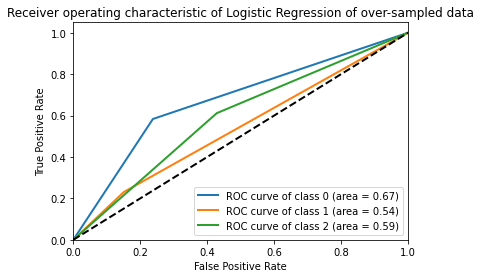

In [45]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(ypred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression of over-sampled data')
plt.legend(loc="lower right")
plt.show()

- Logostic Regression on over-sampled data is performing is better than under-sampling data.

# 5. In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

## Multinomial Naive Bayes

In [46]:
mnb_model = MultinomialNB()
mnb_model.fit(x_train,y_train)
ypred = mnb_model.predict(x_val)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_val, ypred)))
print("\nClassification report : \n", classification_report(y_val, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(y_val, ypred))

print("\nTrain Data Score : ",mnb_model.score(x_train,y_train))
print("\nTest Data Score : ",mnb_model.score(x_val,y_val))


Accuracy on validation set: 0.8770

Classification report : 
               precision    recall  f1-score   support

           0       0.43      0.54      0.48        24
           1       0.16      0.36      0.22        39
           2       0.97      0.91      0.94       937

    accuracy                           0.88      1000
   macro avg       0.52      0.60      0.54      1000
weighted avg       0.92      0.88      0.90      1000


Confusion Matrix : 
 [[ 13   3   8]
 [  3  14  22]
 [ 14  73 850]]

Train Data Score :  0.9566865186789388

Test Data Score :  0.877


0.713653601910903


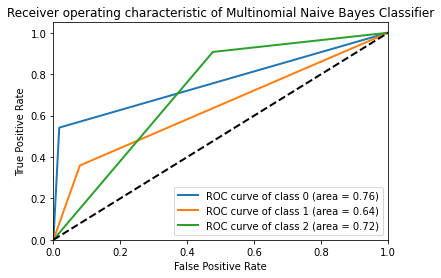

In [47]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(ypred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Multinomial Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

# 6. Use Tree-based classifiers like Random Forest and XGBoost.
- Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

## Random Forest Classifier

In [48]:
rfc_model = RandomForestClassifier(n_estimators=400,random_state=11)
rfc_model.fit(x_train,y_train)
ypred = rfc_model.predict(x_val)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_val, ypred)))
print("\nClassification report : \n", classification_report(y_val, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(y_val, ypred))

print("\nTrain Data Score : ",rfc_model.score(x_train,y_train))
print("\nTest Data Score : ",rfc_model.score(x_val,y_val))


Accuracy on validation set: 0.9540

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.26      0.41        39
           2       0.95      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.98      0.52      0.61      1000
weighted avg       0.96      0.95      0.94      1000


Confusion Matrix : 
 [[  7   0  17]
 [  0  10  29]
 [  0   0 937]]

Train Data Score :  1.0

Test Data Score :  0.954


0.6349206349206349


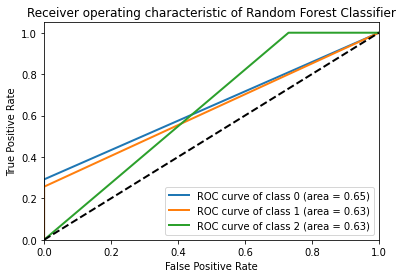

In [49]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(ypred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

## XGB Classifier

In [50]:
xgb_model = XGBClassifier(n_estimators=1000,max_depth=6)
xgb_model.fit(x_train,y_train)
ypred = xgb_model.predict(x_val)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_val, ypred)))
print("\nClassification report : \n", classification_report(y_val, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(y_val, ypred))

print("\nTrain Data Score : ",xgb_model.score(x_train,y_train))
print("\nTest Data Score : ",xgb_model.score(x_val,y_val))


Accuracy on validation set: 0.9560

Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.42      0.53        24
           1       0.81      0.33      0.47        39
           2       0.96      1.00      0.98       937

    accuracy                           0.96      1000
   macro avg       0.83      0.58      0.66      1000
weighted avg       0.95      0.96      0.95      1000


Confusion Matrix : 
 [[ 10   1  13]
 [  2  13  24]
 [  2   2 933]]

Train Data Score :  1.0

Test Data Score :  0.956


0.7027391519318474


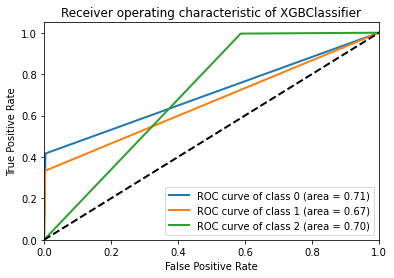

In [51]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(ypred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of XGBClassifier')
plt.legend(loc="lower right")
plt.show()

- We can see that XGBoost is performing better in predicting all the classes.

# Project Task: Week 2

# Model Selection:

1. Apply multi-class SVM’s and neural nets.

2. Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.

3. Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

# 1. Apply multi-class SVM’s and neural nets.

## Support Vector Machine

In [52]:
svm_linear = SVC(kernel='linear',class_weight='balanced',random_state=11).fit(x_train,y_train)
svm_poly = SVC(kernel='poly',class_weight='balanced',random_state=11).fit(x_train,y_train)
svm_rbf = SVC(kernel='rbf',class_weight='balanced',random_state=11).fit(x_train,y_train)
svm_sigmoid = SVC(kernel='sigmoid',class_weight='balanced',random_state=11).fit(x_train,y_train)

In [53]:
linear_pred = svm_linear.predict(x_val)
poly_pred = svm_poly.predict(x_val)
rbf_pred = svm_rbf.predict(x_val)
sigmoid_pred = svm_sigmoid.predict(x_val)

In [54]:
print('Linear Kernel :-')
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_val, linear_pred)))
print("\nClassification report : \n", classification_report(y_val, linear_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_val, linear_pred))
print("\nTrain Data Score : ",svm_linear.score(x_train,y_train))
print("\nTest Data Score : ",svm_linear.score(x_val,y_val))

print('\nPolynomial Kernel :-')
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_val, ypred)))
print("\nClassification report : \n", classification_report(y_val, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(y_val, ypred))
print("\nTrain Data Score : ",svm_poly.score(x_train,y_train))
print("\nTest Data Score : ",svm_poly.score(x_val,y_val))

print('\nrbf Kernel :-')
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_val, ypred)))
print("\nClassification report : \n", classification_report(y_val, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(y_val, ypred))
print("\nTrain Data Score : ",svm_rbf.score(x_train,y_train))
print("\nTest Data Score : ",svm_rbf.score(x_val,y_val))

print('\nSigmoid Kernel :-')
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_val, ypred)))
print("\nClassification report : \n", classification_report(y_val, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(y_val, ypred))
print("\nTrain Data Score : ",svm_sigmoid.score(x_train,y_train))
print("\nTest Data Score : ",svm_sigmoid.score(x_val,y_val))

Linear Kernel :-

Accuracy on validation set: 0.8860

Classification report : 
               precision    recall  f1-score   support

           0       0.36      0.54      0.43        24
           1       0.21      0.44      0.28        39
           2       0.97      0.91      0.94       937

    accuracy                           0.89      1000
   macro avg       0.51      0.63      0.55      1000
weighted avg       0.93      0.89      0.90      1000


Confusion Matrix : 
 [[ 13   3   8]
 [  4  17  18]
 [ 19  62 856]]

Train Data Score :  0.8948745713770078

Test Data Score :  0.886

Polynomial Kernel :-

Accuracy on validation set: 0.9560

Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.42      0.53        24
           1       0.81      0.33      0.47        39
           2       0.96      1.00      0.98       937

    accuracy                           0.96      1000
   macro avg       0.83      0.58      0.66     

0.7480490681599286


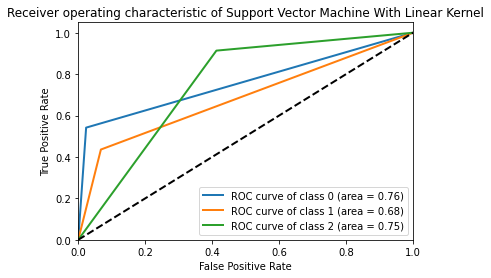

In [55]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(linear_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Support Vector Machine With Linear Kernel')
plt.legend(loc="lower right")
plt.show()

0.5214670449643838


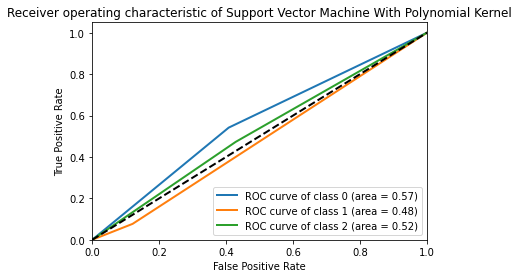

In [56]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(poly_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Support Vector Machine With Polynomial Kernel')
plt.legend(loc="lower right")
plt.show()

## Neural Network

In [57]:
# Simple Neural Network

model = Sequential()
model.add(Dense(units=100,activation='relu',input_dim=x_train1.shape[1]))
model.add(Dense(units=80,activation='relu'))
model.add(Dense(units=80,activation='relu'))
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

ytrain_2 = label_binarize(y_train1, classes=[0, 1, 2])

model.fit(x_train1,ytrain_2,batch_size=512,epochs=10,verbose=1)

# Model Evaluation
ytest_2 = label_binarize(y_val1, classes=[0, 1, 2])
score = model.evaluate(x_val1,ytest_2, batch_size=512)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/10
8/8 [==============================] - 17s 104ms/step - loss: 6.4703 - accuracy: 0.5857
Epoch 2/10
8/8 [==============================] - 1s 132ms/step - loss: 1.0113 - accuracy: 0.9371
Epoch 3/10
8/8 [==============================] - 1s 67ms/step - loss: 0.4671 - accuracy: 0.9371
Epoch 4/10
8/8 [==============================] - 1s 65ms/step - loss: 0.3122 - accuracy: 0.9371
Epoch 5/10
8/8 [==============================] - 1s 74ms/step - loss: 0.3016 - accuracy: 0.9371
Epoch 6/10
8/8 [==============================] - 1s 64ms/step - loss: 0.2873 - accuracy: 0.9371
Epoch 7/10
8/8 [==============================] - 1s 66ms/step - loss: 0.2762 - accuracy: 0.9371
Epoch 8/10
8/8 [==============================] - 1s 68ms/step - loss: 0.2803 - accuracy: 0.9371
Epoch 9/10
8/8 [==============================] - 1s 66ms/step - loss: 0.2765 - accuracy: 0.9371
Epoch 10/10
2/2 [==============================] - 1s 34ms/step - loss: 0.2777 - accuracy: 0.9370
Test loss : 0.2777
Test ac

In [58]:
#using dropouts 

model = Sequential()
model.add(Dense(units=50,activation='relu',input_dim=x_train1.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=40,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=40,activation='relu'))
model.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

ytrain_2 = label_binarize(y_train1, classes=[0, 1, 2])

model.fit(x_train1,ytrain_2,batch_size=256,epochs=10,verbose=1)

# Model Evaluation
ytest_2 = label_binarize(y_val1, classes=[0, 1, 2])
score = model.evaluate(x_val1,ytest_2, batch_size=512)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/10
16/16 [==============================] - 5s 49ms/step - loss: 0.4780 - accuracy: 0.9069
Epoch 2/10
16/16 [==============================] - 0s 27ms/step - loss: 0.3241 - accuracy: 0.9353
Epoch 3/10
16/16 [==============================] - 0s 26ms/step - loss: 0.3016 - accuracy: 0.9363
Epoch 4/10
16/16 [==============================] - 0s 27ms/step - loss: 0.2963 - accuracy: 0.9371
Epoch 5/10
16/16 [==============================] - 0s 26ms/step - loss: 0.2901 - accuracy: 0.9371
Epoch 6/10
16/16 [==============================] - 0s 28ms/step - loss: 0.2940 - accuracy: 0.9371
Epoch 7/10
16/16 [==============================] - 0s 27ms/step - loss: 0.2920 - accuracy: 0.9371
Epoch 8/10
16/16 [==============================] - 0s 27ms/step - loss: 0.2889 - accuracy: 0.9371
Epoch 9/10
16/16 [==============================] - 1s 32ms/step - loss: 0.2874 - accuracy: 0.9371
Epoch 10/10
2/2 [==============================] - 1s 91ms/step - loss: 0.2978 - accuracy: 0.9370
Test loss :

In [59]:
# for over-sampled data

model = Sequential()
model.add(Dense(units=50,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(units=150,activation='relu'))
model.add(Dense(units=40,activation='relu'))
model.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

ytrain_2 = label_binarize(y_train, classes=[0, 1, 2])

model.fit(x_train,ytrain_2,batch_size=512,epochs=20,verbose=1)

# Model Evaluation
ytest_2 = label_binarize(y_val, classes=[0, 1, 2])
score = model.evaluate(x_val,ytest_2, batch_size=512)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/20
22/22 [==============================] - 4s 58ms/step - loss: 1.2503 - accuracy: 0.3512
Epoch 2/20
22/22 [==============================] - 1s 49ms/step - loss: 1.0960 - accuracy: 0.3688
Epoch 3/20
22/22 [==============================] - 1s 43ms/step - loss: 1.0835 - accuracy: 0.3805
Epoch 4/20
22/22 [==============================] - 1s 43ms/step - loss: 1.0677 - accuracy: 0.5337
Epoch 5/20
22/22 [==============================] - 1s 48ms/step - loss: 1.0581 - accuracy: 0.5017
Epoch 6/20
22/22 [==============================] - 1s 46ms/step - loss: 1.0410 - accuracy: 0.5191
Epoch 7/20
22/22 [==============================] - 1s 44ms/step - loss: 1.0211 - accuracy: 0.5162
Epoch 8/20
22/22 [==============================] - 1s 44ms/step - loss: 1.0024 - accuracy: 0.5112
Epoch 9/20
22/22 [==============================] - 1s 44ms/step - loss: 0.9553 - accuracy: 0.7060
Epoch 10/20
22/22 [==============================] - 1s 46ms/step - loss: 0.9147 - accuracy: 0.6742
Epoch 11/

- Using drop out chances of predicting second class increases
- Using Over-sampled data for neural network does not improve the performance

# 2. Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.

In [60]:
model1 = MultinomialNB()
model2 =  XGBClassifier(n_estimators=1000,max_depth=6)

model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')

model.fit(x_train,y_train)

y_pred = model.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[ 14   2   8]
 [  4  16  19]
 [ 16  74 847]]
              precision    recall  f1-score   support

           0       0.41      0.58      0.48        24
           1       0.17      0.41      0.24        39
           2       0.97      0.90      0.94       937

    accuracy                           0.88      1000
   macro avg       0.52      0.63      0.55      1000
weighted avg       0.92      0.88      0.90      1000

accuracy :  87.7


- We can see that the above model performance is same as oversampled multinominal model but it increases the chances of prediction of minority class.

# 3. Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

In [61]:
train['sentiment_score'] = train['reviews.text'].apply(lambda x: TextBlob(x).sentiment)
test_hidden['sentiment_score'] = test_hidden['reviews.text'].apply(lambda x: TextBlob(x).sentiment)

train['polarity'] = train['reviews.text'].apply(lambda x: TextBlob(x).polarity+1)
test_hidden['polarity'] = test_hidden['reviews.text'].apply(lambda x: TextBlob(x).polarity+1)

train.sentiment_score.head()

0     (0.37479166666666663, 0.6791666666666667)
1    (0.45821428571428574, 0.49821428571428567)
2                    (0.69, 0.6033333333333335)
3                              (0.1875, 0.4375)
4                   (0.6000000000000001, 0.725)
Name: sentiment_score, dtype: object

In [62]:
Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment','sentiment_score'],axis=1),
                   tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_hidden.drop(['reviews.text','reviews.title','sentiment','sentiment_score'],axis=1),
                      tvec_text2, tvec_title2],axis=1)
x_train = Train.values
y_train = train['sentiment']
x_val = Test_Val.values
y_val = test_hidden['sentiment']

In [63]:
mnb_model = MultinomialNB()
mnb_model.fit(x_train,y_train)

ypred = mnb_model.predict(x_val)

print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_val, ypred)))
print("\nClassification report : \n", classification_report(y_val, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(y_val, ypred))
print("\nTrain Data Score : ",mnb_model.score(x_train,y_train))
print("\nTest Data Score : ",mnb_model.score(x_val,y_val))


Accuracy on validation set: 0.8770

Classification report : 
               precision    recall  f1-score   support

           0       0.45      0.54      0.49        24
           1       0.15      0.36      0.22        39
           2       0.97      0.91      0.94       937

    accuracy                           0.88      1000
   macro avg       0.52      0.60      0.55      1000
weighted avg       0.92      0.88      0.90      1000


Confusion Matrix : 
 [[ 13   3   8]
 [  3  14  22]
 [ 13  74 850]]

Train Data Score :  0.9591229020032485

Test Data Score :  0.877


- Sentiment score does not affect on the performance.

# Applying LSTM:

4. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)

5. Compare the accuracy of neural nets with traditional ML based algorithms.

6. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral. 

# 4. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)

# LSTM

- Long Short Term Memory(LSTM) Networks are a special kind of the Recurrent Neural Networks(RNN) capable of learning long-term dependencies. LSTM can be very useful in text mining problems as it involves dependencies in the sentences which can be caught in the "memory" of the LSTM.  

In [64]:
# max_features = 5000
maxlen = 80
epochs = 3
batch_size = 512

y_train2 = label_binarize(y_train1, classes=[0, 1, 2])

Xtrain = pad_sequences(x_train1, maxlen=maxlen) 
Xtest = pad_sequences(x_val1, maxlen=maxlen) 

model = Sequential()
model.add(Embedding(Xtrain.shape[1],128,input_length=Xtrain.shape[1])) 
model.add(SpatialDropout1D(0.7))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(Xtrain, y_train2, epochs=epochs, batch_size=batch_size,verbose=1)

ytest_2 = label_binarize(y_val1, classes=[0, 1, 2])
score = model.evaluate(Xtest,ytest_2, batch_size=512)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 128)           10240     
                                                                 
 spatial_dropout1d (SpatialD  (None, 80, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_12 (Dense)            (None, 3)                 387       
                                                                 
Total params: 142,211
Trainable params: 142,211
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
8/8 [==============================] - 34s 2s/step - loss: 0.8840 - accuracy: 0.7737
Epoch 2/3
8/8 [====

In [65]:
#for over_sampled data

y_train2 = label_binarize(y_train, classes=[0, 1, 2])

Xtrain_1 = pad_sequences(x_train, maxlen=maxlen) 
Xtest_1 = pad_sequences(x_val, maxlen=maxlen) 

emb_dim = 128                                                 
epochs = 3
batch_size = 256
model = Sequential()
model.add(Embedding(Xtrain_1.shape[1],128,input_length=Xtrain_1.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(Xtrain_1, y_train2, epochs=epochs, batch_size=batch_size,verbose=1)

ytest_2 = label_binarize(y_val, classes=[0, 1, 2])
score = model.evaluate(Xtest_1,ytest_2, batch_size=512)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/3
44/44 [==============================] - 47s 867ms/step - loss: 1.1001 - acc: 0.3352
Epoch 2/3
44/44 [==============================] - 37s 841ms/step - loss: 1.0999 - acc: 0.3262
Epoch 3/3
2/2 [==============================] - 2s 284ms/step - loss: 1.0946 - acc: 0.9370
Test loss : 1.0946
Test accuracy : 0.9370


# 6.Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral.

## GRU

In [66]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
epochs = 3
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(Xtrain.shape[1], emb_dim, input_length=Xtrain.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(GRU(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(Xtrain, y_train2, epochs=epochs, batch_size=batch_size,verbose=1)

ytest_2 = label_binarize(y_val1, classes=[0, 1, 2])
score = model.evaluate(Xtest,ytest_2, batch_size=512)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/3
16/16 [==============================] - 17s 679ms/step - loss: 0.7347 - accuracy: 0.8932
Epoch 2/3
16/16 [==============================] - 11s 663ms/step - loss: 0.3157 - accuracy: 0.9371
Epoch 3/3
2/2 [==============================] - 44s 277ms/step - loss: 0.2787 - accuracy: 0.9370
Test loss : 0.2787
Test accuracy : 0.9370


- We can see from above that LSTM and GRU models are not efficient in predicting minor classes.ANN is performing quite good in solving class imbalance problem but it cannot beat traditional ML agorithms.

# Topic Modeling:

7. Cluster similar reviews.

- Note: Some reviews may talk about the device as a gift-option. Other reviews may be about product looks and some may highlight about its battery and performance. Try naming the clusters.

8. Perform Topic Modeling

# 7. Cluster similar reviews.

- Note: Some reviews may talk about the device as a gift-option. Other reviews may be about product looks and some may highlight about its battery and performance. Try naming the clusters.

In [67]:
print(words[200:300])

['continu', 'control', 'conveni', 'cook', 'cool', 'cord', 'cost', 'could', 'counter', 'countri', 'coupl', 'cours', 'cover', 'crack', 'crazi', 'creat', 'credit', 'crisp', 'current', 'curv', 'custom', 'daili', 'damag', 'dark', 'data', 'date', 'daughter', 'day', 'deal', 'decent', 'decid', 'defect', 'definit', 'deliv', 'descript', 'design', 'desk', 'despit', 'develop', 'devic', 'didnt', 'die', 'differ', 'difficult', 'digit', 'direct', 'disabl', 'disappoint', 'discov', 'display', 'distract', 'doe', 'dollar', 'done', 'dont', 'door', 'doorbel', 'dot', 'downfal', 'download', 'downsid', 'drain', 'drawback', 'drive', 'drop', 'durabl', 'dure', 'earli', 'earlier', 'eas', 'easi', 'easier', 'easili', 'ebook', 'echo', 'edit', 'educ', 'effect', 'effici', 'either', 'electron', 'els', 'email', 'employe', 'enabl', 'end', 'enjoy', 'enlarg', 'enough', 'entertain', 'entir', 'entri', 'equip', 'eread', 'especi', 'even', 'event', 'ever', 'everi', 'everyday']


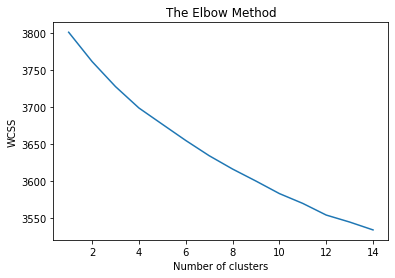

In [68]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=11)
    kmeans.fit(reviews)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- As no proper elbow is generated, I will select the right amount of clusters by trial and error. So, I will showcase the results of different amount of clusters to find out the right amount of clusters.

# 8. Perform Topic Modeling

In [41]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [42]:
doc_complete = train["reviews.text"].tolist()
doc_clean = [cleanText(doc).split() for doc in doc_complete]

dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Dictionary<3974 unique tokens: ['able', 'access', 'accomplish', 'add', 'amazing']...>


In [43]:
NUM_TOPICS = 11
ldamodel = LdaModel(doc_term_matrix, num_topics=NUM_TOPICS, id2word=dictionary, passes=30)

In [44]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(4, '0.044*"show" + 0.042*"slow" + 0.032*"when" + 0.027*"returned" + 0.026*"work" + 0.025*"could" + 0.024*"plugged" + 0.023*"cloudcam" + 0.022*"very" + 0.022*"than"')

(0, '0.042*"echo" + 0.023*"alexa" + 0.019*"show" + 0.016*"that" + 0.016*"have" + 0.015*"screen" + 0.014*"more" + 0.014*"music" + 0.014*"like" + 0.013*"thing"')

(2, '0.070*"tablet" + 0.052*"this" + 0.039*"great" + 0.031*"kid" + 0.031*"love" + 0.030*"good" + 0.027*"price" + 0.024*"that" + 0.023*"bought" + 0.022*"with"')

(1, '0.029*"this" + 0.021*"bought" + 0.017*"time" + 0.017*"they" + 0.016*"ipad" + 0.016*"charger" + 0.016*"will" + 0.015*"that" + 0.015*"charge" + 0.014*"problem"')

(10, '0.025*"this" + 0.023*"would" + 0.020*"with" + 0.020*"device" + 0.019*"good" + 0.019*"kindle" + 0.019*"which" + 0.018*"reading" + 0.014*"battery" + 0.014*"have"')

(5, '0.041*"that" + 0.029*"with" + 0.029*"this" + 0.022*"tablet" + 0.022*"amazon" + 0.021*"about" + 0.020*"like" + 0.019*"have" + 0.017*"when" + 0.015*"game"')

(9, '0.040*"mo

In [45]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [46]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8,Topic # 9,Topic # 10
0,echo,this,tablet,this,show,that,this,work,this,model,this
1,alexa,bought,this,tablet,slow,with,very,good,le,last,would
2,show,time,great,amazon,when,this,what,with,useless,they,with
3,that,they,kid,week,returned,tablet,kindle,price,work,kindle,device
4,have,ipad,love,account,work,amazon,with,tablet,apps,have,good
5,screen,charger,good,apps,could,about,happy,many,than,better,kindle
6,more,will,price,junk,plugged,like,fire,camera,have,year,which
7,music,that,that,google,cloudcam,have,tablet,amazon,with,quality,reading
8,like,charge,bought,have,very,when,friendly,well,more,speaker,battery
9,thing,problem,with,bought,than,game,user,this,that,same,have


### Displaying Results & Getting Insights

In [47]:
lda_display = pyLDAvis.gensim_models.prepare(ldamodel,doc_term_matrix,dictionary,sort_topics=False)
pyLDAvis.display(lda_display)

### Creating Wordcloud

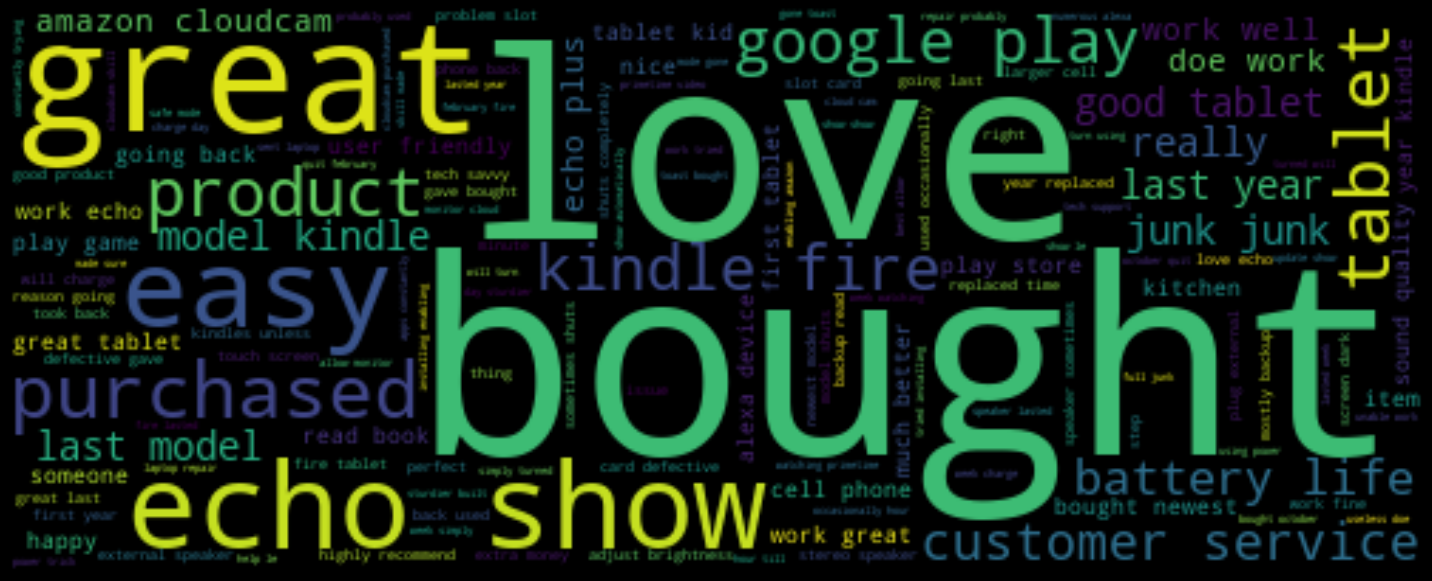

In [48]:
text = ' '.join([text for text in train['reviews.text']])
wc = WordCloud(width=500,height=200,background_color='black',stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(20,20),facecolor='k',edgecolor='w')
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()